## Multiple linear regression(MLR) Stochastic Gradient Descent(SGD),
### with optuna and StandardScaler
on subsampled dataset with 3fold un shuffled cv
20220927

In [1]:
import pandas as pd
import numpy as np
import random
import optuna as opt
import time
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
#import data
train_df = pd.read_parquet("train_main.parquet.snappy")
test_df = pd.read_parquet("test_main.parquet.snappy")

In [3]:
X_train = train_df.drop(['r_id','r_useful'],axis=1)
y_train = train_df['r_useful']
X_test = test_df.drop(['r_id','r_useful'],axis=1)
y_test = test_df['r_useful']

# standardise the features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [4]:
random.seed(760)

In [7]:
def objective(trial):
    start = time.time()
    params = {
        "alpha": trial.suggest_float('alpha', 0.00001, 0.005),
        "eta0": trial.suggest_float('eta0', 0.005, 0.1),
        "power_t": trial.suggest_float('power_t', 0.1, 0.5),
        "learning_rate" : trial.suggest_categorical("learning_rate", ['constant', 'optimal', 'invscaling', 'adaptive']),
    }
    print("Currently running with:")
    print(params)
    
    model = SGDRegressor(**params)
    
    # model.fit(X_train, y_train)
    cvscore = np.sqrt(-np.mean(cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv=3)))
    # y_pred = model.predict(X_val)
    print("Time cost:", time.time()-start)
    # return mean_squared_error(y_val, y_pred, squared=False)
    return cvscore

In [8]:
study = opt.create_study(direction = 'minimize')
study.optimize(objective, n_trials = 50)
study.best_params

[I 2022-09-27 21:33:35,217] A new study created in memory with name: no-name-b45570dd-3cee-47c4-846e-1ad3baa93d77


Currently running with:
{'alpha': 0.002060629794082939, 'eta0': 0.07648919656194379, 'power_t': 0.13385328671848573, 'learning_rate': 'optimal'}


[I 2022-09-27 21:33:37,762] Trial 0 finished with value: 3.811670953441106 and parameters: {'alpha': 0.002060629794082939, 'eta0': 0.07648919656194379, 'power_t': 0.13385328671848573, 'learning_rate': 'optimal'}. Best is trial 0 with value: 3.811670953441106.


Time cost: 2.5436158180236816
Currently running with:
{'alpha': 0.0017801240633961682, 'eta0': 0.08510697029706524, 'power_t': 0.13294795654746583, 'learning_rate': 'invscaling'}


[I 2022-09-27 21:33:39,681] Trial 1 finished with value: 4.133560292674331 and parameters: {'alpha': 0.0017801240633961682, 'eta0': 0.08510697029706524, 'power_t': 0.13294795654746583, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 3.811670953441106.


Time cost: 1.9190051555633545
Currently running with:
{'alpha': 0.0012547667772409628, 'eta0': 0.06460459169239825, 'power_t': 0.14721840705186873, 'learning_rate': 'constant'}


[I 2022-09-27 21:33:40,869] Trial 2 finished with value: 71645859733.37494 and parameters: {'alpha': 0.0012547667772409628, 'eta0': 0.06460459169239825, 'power_t': 0.14721840705186873, 'learning_rate': 'constant'}. Best is trial 0 with value: 3.811670953441106.


Time cost: 1.1855711936950684
Currently running with:
{'alpha': 0.004365033318647794, 'eta0': 0.008140201440448639, 'power_t': 0.3781755191136269, 'learning_rate': 'constant'}


[I 2022-09-27 21:33:41,940] Trial 3 finished with value: 4.037528751228446 and parameters: {'alpha': 0.004365033318647794, 'eta0': 0.008140201440448639, 'power_t': 0.3781755191136269, 'learning_rate': 'constant'}. Best is trial 0 with value: 3.811670953441106.


Time cost: 1.0713386535644531
Currently running with:
{'alpha': 0.0005441054392776089, 'eta0': 0.0858479577108402, 'power_t': 0.3860804925524597, 'learning_rate': 'constant'}


[I 2022-09-27 21:33:42,859] Trial 4 finished with value: 29052486620.170174 and parameters: {'alpha': 0.0005441054392776089, 'eta0': 0.0858479577108402, 'power_t': 0.3860804925524597, 'learning_rate': 'constant'}. Best is trial 0 with value: 3.811670953441106.


Time cost: 0.9189512729644775
Currently running with:
{'alpha': 0.001341980240720026, 'eta0': 0.015471640089214665, 'power_t': 0.3845965435015961, 'learning_rate': 'optimal'}


[I 2022-09-27 21:33:45,353] Trial 5 finished with value: 3.8124876223018984 and parameters: {'alpha': 0.001341980240720026, 'eta0': 0.015471640089214665, 'power_t': 0.3845965435015961, 'learning_rate': 'optimal'}. Best is trial 0 with value: 3.811670953441106.


Time cost: 2.4929113388061523
Currently running with:
{'alpha': 0.000704474672816286, 'eta0': 0.08248525187634795, 'power_t': 0.43857171810987805, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:33:51,455] Trial 6 finished with value: 3.8100230482207795 and parameters: {'alpha': 0.000704474672816286, 'eta0': 0.08248525187634795, 'power_t': 0.43857171810987805, 'learning_rate': 'adaptive'}. Best is trial 6 with value: 3.8100230482207795.


Time cost: 6.102144002914429
Currently running with:
{'alpha': 0.0016750638057377828, 'eta0': 0.03204200352996582, 'power_t': 0.4010631889929801, 'learning_rate': 'constant'}


[I 2022-09-27 21:33:52,286] Trial 7 finished with value: 4.5775044846461235 and parameters: {'alpha': 0.0016750638057377828, 'eta0': 0.03204200352996582, 'power_t': 0.4010631889929801, 'learning_rate': 'constant'}. Best is trial 6 with value: 3.8100230482207795.


Time cost: 0.8302726745605469
Currently running with:
{'alpha': 0.0013342763631496177, 'eta0': 0.05537517598637437, 'power_t': 0.2058235069701032, 'learning_rate': 'optimal'}


[I 2022-09-27 21:33:54,864] Trial 8 finished with value: 3.8113551053426162 and parameters: {'alpha': 0.0013342763631496177, 'eta0': 0.05537517598637437, 'power_t': 0.2058235069701032, 'learning_rate': 'optimal'}. Best is trial 6 with value: 3.8100230482207795.


Time cost: 2.575916051864624
Currently running with:
{'alpha': 0.0011445233298311723, 'eta0': 0.04370986195717069, 'power_t': 0.29307451315945154, 'learning_rate': 'constant'}


[I 2022-09-27 21:33:55,663] Trial 9 finished with value: 6090193.664760735 and parameters: {'alpha': 0.0011445233298311723, 'eta0': 0.04370986195717069, 'power_t': 0.29307451315945154, 'learning_rate': 'constant'}. Best is trial 6 with value: 3.8100230482207795.


Time cost: 0.7986555099487305
Currently running with:
{'alpha': 0.0033783284130177935, 'eta0': 0.09643050521210184, 'power_t': 0.4682757478028082, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:01,053] Trial 10 finished with value: 3.810334823732801 and parameters: {'alpha': 0.0033783284130177935, 'eta0': 0.09643050521210184, 'power_t': 0.4682757478028082, 'learning_rate': 'adaptive'}. Best is trial 6 with value: 3.8100230482207795.


Time cost: 5.389671802520752
Currently running with:
{'alpha': 0.003234339162329388, 'eta0': 0.0990504423260559, 'power_t': 0.47242342786589914, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:06,075] Trial 11 finished with value: 3.8103091103615747 and parameters: {'alpha': 0.003234339162329388, 'eta0': 0.0990504423260559, 'power_t': 0.47242342786589914, 'learning_rate': 'adaptive'}. Best is trial 6 with value: 3.8100230482207795.


Time cost: 5.020378112792969
Currently running with:
{'alpha': 0.0029451701297326036, 'eta0': 0.09846789491517675, 'power_t': 0.4878741183667104, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:11,590] Trial 12 finished with value: 3.8102488793640488 and parameters: {'alpha': 0.0029451701297326036, 'eta0': 0.09846789491517675, 'power_t': 0.4878741183667104, 'learning_rate': 'adaptive'}. Best is trial 6 with value: 3.8100230482207795.


Time cost: 5.51449179649353
Currently running with:
{'alpha': 1.4632804556385156e-05, 'eta0': 0.07138168112612864, 'power_t': 0.47267200273907894, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:17,650] Trial 13 finished with value: 3.8100341236801754 and parameters: {'alpha': 1.4632804556385156e-05, 'eta0': 0.07138168112612864, 'power_t': 0.47267200273907894, 'learning_rate': 'adaptive'}. Best is trial 6 with value: 3.8100230482207795.


Time cost: 6.059195041656494
Currently running with:
{'alpha': 6.87883896491611e-05, 'eta0': 0.06785334100393953, 'power_t': 0.2956242294161411, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:22,575] Trial 14 finished with value: 3.810002325946345 and parameters: {'alpha': 6.87883896491611e-05, 'eta0': 0.06785334100393953, 'power_t': 0.2956242294161411, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 4.924126386642456
Currently running with:
{'alpha': 1.2521166874394847e-05, 'eta0': 0.05802658690831372, 'power_t': 0.28578596574449044, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:28,488] Trial 15 finished with value: 3.810003126320473 and parameters: {'alpha': 1.2521166874394847e-05, 'eta0': 0.05802658690831372, 'power_t': 0.28578596574449044, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 5.913564205169678
Currently running with:
{'alpha': 4.074296586231916e-05, 'eta0': 0.04542310153300006, 'power_t': 0.28960341083929914, 'learning_rate': 'invscaling'}


[I 2022-09-27 21:34:31,022] Trial 16 finished with value: 3.8164931940350963 and parameters: {'alpha': 4.074296586231916e-05, 'eta0': 0.04542310153300006, 'power_t': 0.28960341083929914, 'learning_rate': 'invscaling'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 2.5329957008361816
Currently running with:
{'alpha': 0.004962870976477726, 'eta0': 0.05671244654501128, 'power_t': 0.24052706095541848, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:36,726] Trial 17 finished with value: 3.81056461529066 and parameters: {'alpha': 0.004962870976477726, 'eta0': 0.05671244654501128, 'power_t': 0.24052706095541848, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 5.702970266342163
Currently running with:
{'alpha': 0.0005971460913664461, 'eta0': 0.03023801622054243, 'power_t': 0.24563859864016108, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:41,833] Trial 18 finished with value: 3.8100488140102136 and parameters: {'alpha': 0.0005971460913664461, 'eta0': 0.03023801622054243, 'power_t': 0.24563859864016108, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 5.105737686157227
Currently running with:
{'alpha': 0.00043872106025595093, 'eta0': 0.06665196183340863, 'power_t': 0.3435671178262042, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:48,060] Trial 19 finished with value: 3.8100202585237857 and parameters: {'alpha': 0.00043872106025595093, 'eta0': 0.06665196183340863, 'power_t': 0.3435671178262042, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 6.227092981338501
Currently running with:
{'alpha': 0.002467846269821057, 'eta0': 0.044798156964347434, 'power_t': 0.33063220547364264, 'learning_rate': 'invscaling'}


[I 2022-09-27 21:34:50,264] Trial 20 finished with value: 3.819103109656988 and parameters: {'alpha': 0.002467846269821057, 'eta0': 0.044798156964347434, 'power_t': 0.33063220547364264, 'learning_rate': 'invscaling'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 2.2023587226867676
Currently running with:
{'alpha': 0.0003282705466782377, 'eta0': 0.06537761973620722, 'power_t': 0.33191274081022504, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:55,083] Trial 21 finished with value: 3.8100183153453844 and parameters: {'alpha': 0.0003282705466782377, 'eta0': 0.06537761973620722, 'power_t': 0.33191274081022504, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 4.818409442901611
Currently running with:
{'alpha': 1.281539060941112e-05, 'eta0': 0.06196375308331685, 'power_t': 0.2616102434212142, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:34:59,899] Trial 22 finished with value: 3.810016935932415 and parameters: {'alpha': 1.281539060941112e-05, 'eta0': 0.06196375308331685, 'power_t': 0.2616102434212142, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 4.815106153488159
Currently running with:
{'alpha': 0.0008853588565632129, 'eta0': 0.05739857354892941, 'power_t': 0.25215769363941837, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:35:04,378] Trial 23 finished with value: 3.8100262916156957 and parameters: {'alpha': 0.0008853588565632129, 'eta0': 0.05739857354892941, 'power_t': 0.25215769363941837, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 4.477515697479248
Currently running with:
{'alpha': 4.731286846075509e-05, 'eta0': 0.07392631510059561, 'power_t': 0.21739701616945972, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:35:09,436] Trial 24 finished with value: 3.810022331060095 and parameters: {'alpha': 4.731286846075509e-05, 'eta0': 0.07392631510059561, 'power_t': 0.21739701616945972, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 5.056739568710327
Currently running with:
{'alpha': 0.0009246796102144353, 'eta0': 0.036305742694659186, 'power_t': 0.17248032433770258, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:35:14,173] Trial 25 finished with value: 3.8100201902003805 and parameters: {'alpha': 0.0009246796102144353, 'eta0': 0.036305742694659186, 'power_t': 0.17248032433770258, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.810002325946345.


Time cost: 4.736776828765869
Currently running with:
{'alpha': 0.0003507140897775417, 'eta0': 0.049766910458968264, 'power_t': 0.27780691334443763, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:35:19,472] Trial 26 finished with value: 3.8099933784424187 and parameters: {'alpha': 0.0003507140897775417, 'eta0': 0.049766910458968264, 'power_t': 0.27780691334443763, 'learning_rate': 'adaptive'}. Best is trial 26 with value: 3.8099933784424187.


Time cost: 5.298367023468018
Currently running with:
{'alpha': 0.0004487724580652581, 'eta0': 0.051183359745288856, 'power_t': 0.3132281428784741, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:35:25,718] Trial 27 finished with value: 3.810012760294984 and parameters: {'alpha': 0.0004487724580652581, 'eta0': 0.051183359745288856, 'power_t': 0.3132281428784741, 'learning_rate': 'adaptive'}. Best is trial 26 with value: 3.8099933784424187.


Time cost: 6.245042324066162
Currently running with:
{'alpha': 0.0009460112302753065, 'eta0': 0.022811538012456056, 'power_t': 0.28417866091897953, 'learning_rate': 'optimal'}


[I 2022-09-27 21:35:28,459] Trial 28 finished with value: 3.811889120170779 and parameters: {'alpha': 0.0009460112302753065, 'eta0': 0.022811538012456056, 'power_t': 0.28417866091897953, 'learning_rate': 'optimal'}. Best is trial 26 with value: 3.8099933784424187.


Time cost: 2.7399215698242188
Currently running with:
{'alpha': 0.0023972543253416366, 'eta0': 0.04973023530811026, 'power_t': 0.20249702827052282, 'learning_rate': 'invscaling'}


[I 2022-09-27 21:35:31,164] Trial 29 finished with value: 3.8823564783525875 and parameters: {'alpha': 0.0023972543253416366, 'eta0': 0.04973023530811026, 'power_t': 0.20249702827052282, 'learning_rate': 'invscaling'}. Best is trial 26 with value: 3.8099933784424187.


Time cost: 2.7044568061828613
Currently running with:
{'alpha': 0.0019503692017179572, 'eta0': 0.07773027347981648, 'power_t': 0.2726378209272056, 'learning_rate': 'optimal'}


[I 2022-09-27 21:35:32,785] Trial 30 finished with value: 3.812874795342675 and parameters: {'alpha': 0.0019503692017179572, 'eta0': 0.07773027347981648, 'power_t': 0.2726378209272056, 'learning_rate': 'optimal'}. Best is trial 26 with value: 3.8099933784424187.


Time cost: 1.6196768283843994
Currently running with:
{'alpha': 0.00035892211298664295, 'eta0': 0.05095742384983504, 'power_t': 0.3182730597257874, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:35:39,265] Trial 31 finished with value: 3.8100245227195098 and parameters: {'alpha': 0.00035892211298664295, 'eta0': 0.05095742384983504, 'power_t': 0.3182730597257874, 'learning_rate': 'adaptive'}. Best is trial 26 with value: 3.8099933784424187.


Time cost: 6.4792468547821045
Currently running with:
{'alpha': 0.0003519652261567099, 'eta0': 0.03945267289657289, 'power_t': 0.35366855398729746, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:35:44,538] Trial 32 finished with value: 3.809985308061949 and parameters: {'alpha': 0.0003519652261567099, 'eta0': 0.03945267289657289, 'power_t': 0.35366855398729746, 'learning_rate': 'adaptive'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 5.271732330322266
Currently running with:
{'alpha': 0.001513472229172357, 'eta0': 0.033010967114074204, 'power_t': 0.3547810888697708, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:35:49,052] Trial 33 finished with value: 3.810111519561619 and parameters: {'alpha': 0.001513472229172357, 'eta0': 0.033010967114074204, 'power_t': 0.3547810888697708, 'learning_rate': 'adaptive'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 4.511677026748657
Currently running with:
{'alpha': 0.0008265295105081524, 'eta0': 0.03789766123597157, 'power_t': 0.3578369186202092, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:35:54,352] Trial 34 finished with value: 3.8100308688339557 and parameters: {'alpha': 0.0008265295105081524, 'eta0': 0.03789766123597157, 'power_t': 0.3578369186202092, 'learning_rate': 'adaptive'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 5.300043821334839
Currently running with:
{'alpha': 0.00028970197578085603, 'eta0': 0.05958916399382424, 'power_t': 0.2987674028281959, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:00,118] Trial 35 finished with value: 3.810025987483935 and parameters: {'alpha': 0.00028970197578085603, 'eta0': 0.05958916399382424, 'power_t': 0.2987674028281959, 'learning_rate': 'adaptive'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 5.764476776123047
Currently running with:
{'alpha': 0.0010756687646542745, 'eta0': 0.06875649586997633, 'power_t': 0.10715550101124272, 'learning_rate': 'invscaling'}


[I 2022-09-27 21:36:01,713] Trial 36 finished with value: 5.0192854834469305 and parameters: {'alpha': 0.0010756687646542745, 'eta0': 0.06875649586997633, 'power_t': 0.10715550101124272, 'learning_rate': 'invscaling'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 1.594069004058838
Currently running with:
{'alpha': 0.0038255150729309484, 'eta0': 0.04243245615183751, 'power_t': 0.40625332192117514, 'learning_rate': 'constant'}


[I 2022-09-27 21:36:02,681] Trial 37 finished with value: 34.0080360461544 and parameters: {'alpha': 0.0038255150729309484, 'eta0': 0.04243245615183751, 'power_t': 0.40625332192117514, 'learning_rate': 'constant'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 0.9677474498748779
Currently running with:
{'alpha': 0.0005961047426307718, 'eta0': 0.0894654056352403, 'power_t': 0.36690787524525725, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:08,706] Trial 38 finished with value: 3.810021950670098 and parameters: {'alpha': 0.0005961047426307718, 'eta0': 0.0894654056352403, 'power_t': 0.36690787524525725, 'learning_rate': 'adaptive'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 6.024354934692383
Currently running with:
{'alpha': 0.002169087234824597, 'eta0': 0.025199640482677407, 'power_t': 0.21957249338417423, 'learning_rate': 'optimal'}


[I 2022-09-27 21:36:11,169] Trial 39 finished with value: 3.8123732643691937 and parameters: {'alpha': 0.002169087234824597, 'eta0': 0.025199640482677407, 'power_t': 0.21957249338417423, 'learning_rate': 'optimal'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 2.460538625717163
Currently running with:
{'alpha': 0.0015596716265496636, 'eta0': 0.011441897464021696, 'power_t': 0.31237500131149537, 'learning_rate': 'constant'}


[I 2022-09-27 21:36:12,216] Trial 40 finished with value: 4.179678975931879 and parameters: {'alpha': 0.0015596716265496636, 'eta0': 0.011441897464021696, 'power_t': 0.31237500131149537, 'learning_rate': 'constant'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 1.0454933643341064
Currently running with:
{'alpha': 0.00022749786943467896, 'eta0': 0.0517906444295112, 'power_t': 0.31259144598354305, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:18,544] Trial 41 finished with value: 3.8099985843234494 and parameters: {'alpha': 0.00022749786943467896, 'eta0': 0.0517906444295112, 'power_t': 0.31259144598354305, 'learning_rate': 'adaptive'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 6.327896356582642
Currently running with:
{'alpha': 0.0002480554505383322, 'eta0': 0.047976866537168865, 'power_t': 0.2771201882271289, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:24,654] Trial 42 finished with value: 3.8100314623268603 and parameters: {'alpha': 0.0002480554505383322, 'eta0': 0.047976866537168865, 'power_t': 0.2771201882271289, 'learning_rate': 'adaptive'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 6.108816146850586
Currently running with:
{'alpha': 0.0006309291343541124, 'eta0': 0.053856829883736065, 'power_t': 0.33426595219452665, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:29,617] Trial 43 finished with value: 3.810052781046918 and parameters: {'alpha': 0.0006309291343541124, 'eta0': 0.053856829883736065, 'power_t': 0.33426595219452665, 'learning_rate': 'adaptive'}. Best is trial 32 with value: 3.809985308061949.


Time cost: 4.960942029953003
Currently running with:
{'alpha': 0.00019598195398433035, 'eta0': 0.039803155110261536, 'power_t': 0.4343282673690171, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:35,053] Trial 44 finished with value: 3.809979917232143 and parameters: {'alpha': 0.00019598195398433035, 'eta0': 0.039803155110261536, 'power_t': 0.4343282673690171, 'learning_rate': 'adaptive'}. Best is trial 44 with value: 3.809979917232143.


Time cost: 5.435905933380127
Currently running with:
{'alpha': 0.0013342950028564535, 'eta0': 0.037902490693876745, 'power_t': 0.4216966391874498, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:40,278] Trial 45 finished with value: 3.8100499454731027 and parameters: {'alpha': 0.0013342950028564535, 'eta0': 0.037902490693876745, 'power_t': 0.4216966391874498, 'learning_rate': 'adaptive'}. Best is trial 44 with value: 3.809979917232143.


Time cost: 5.22333836555481
Currently running with:
{'alpha': 0.0007677964372978865, 'eta0': 0.03994817596390953, 'power_t': 0.3845825159886445, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:45,536] Trial 46 finished with value: 3.8100258257990633 and parameters: {'alpha': 0.0007677964372978865, 'eta0': 0.03994817596390953, 'power_t': 0.3845825159886445, 'learning_rate': 'adaptive'}. Best is trial 44 with value: 3.809979917232143.


Time cost: 5.257319688796997
Currently running with:
{'alpha': 0.00020015123397499484, 'eta0': 0.02469766827627199, 'power_t': 0.44855236027930123, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:50,852] Trial 47 finished with value: 3.8099975274589326 and parameters: {'alpha': 0.00020015123397499484, 'eta0': 0.02469766827627199, 'power_t': 0.44855236027930123, 'learning_rate': 'adaptive'}. Best is trial 44 with value: 3.809979917232143.


Time cost: 5.313875675201416
Currently running with:
{'alpha': 0.0011471265103583004, 'eta0': 0.021408364544379128, 'power_t': 0.44764898907939055, 'learning_rate': 'constant'}


[I 2022-09-27 21:36:51,828] Trial 48 finished with value: 38.52496437939304 and parameters: {'alpha': 0.0011471265103583004, 'eta0': 0.021408364544379128, 'power_t': 0.44764898907939055, 'learning_rate': 'constant'}. Best is trial 44 with value: 3.809979917232143.


Time cost: 0.9758293628692627
Currently running with:
{'alpha': 0.00023518662879043914, 'eta0': 0.02900855276824999, 'power_t': 0.49986817848347476, 'learning_rate': 'adaptive'}


[I 2022-09-27 21:36:57,404] Trial 49 finished with value: 3.810008975738665 and parameters: {'alpha': 0.00023518662879043914, 'eta0': 0.02900855276824999, 'power_t': 0.49986817848347476, 'learning_rate': 'adaptive'}. Best is trial 44 with value: 3.809979917232143.


Time cost: 5.574864864349365


{'alpha': 0.00019598195398433035,
 'eta0': 0.039803155110261536,
 'power_t': 0.4343282673690171,
 'learning_rate': 'adaptive'}

In [9]:

sgd = SGDRegressor(alpha = 0.00019598195398433035,
                   eta0 = 0.039803155110261536, 
                   power_t = 0.4343282673690171,
                   learning_rate =  'adaptive')
model = sgd.fit(X_train, y_train)

In [10]:
y_pred_train_sgd = sgd.predict(X_train)
y_pred_test_sgd  = sgd.predict(X_test)


mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)

On training set: RMSE: 3.8096539989920757 MAE 1.654152213257483
On test set: RMSE: 4.421165491954065 MAE 1.6838440246716755


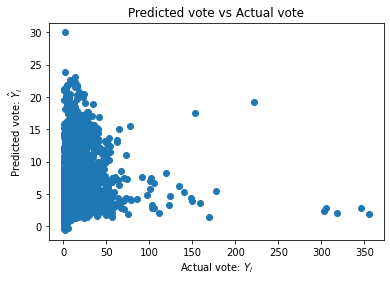

In [11]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test_sgd)
plt.xlabel("Actual vote: $Y_i$")
plt.ylabel("Predicted vote: $\hat{Y}_i$")
plt.title("Predicted vote vs Actual vote")
plt.show()